# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import random
import gmaps
from scipy.stats import linregress
from pprint import pprint
import os
import csv
import json


# Import API key
from config import api_key_weather
from config import api_key_google_maps

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)  

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key_weather

# Generate Cities List


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

623

# Perform API Calls

In [3]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name)


In [4]:
# create empty lists to store the data
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [5]:
record_counter = 0
set_counter = 0

print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

# use for loop to add city to base url
for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(query_url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')


------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=fort nelson
Processing record 2 of set 0 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=atuona
Processing record 3 of set 0 | simpang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=simpang
Processing record 4 of set 0 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=georgetown
Processing record 5 of set 0 | cieza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=cieza
Processing record 6 of set 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=punta arenas
Process

Processing record 4 of set 1 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=harper
Processing record 5 of set 1 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=barentsburg
City not found!
Processing record 6 of set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=vaini
Processing record 7 of set 1 | belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=belmonte
Processing record 8 of set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=hermanus
Processing record 9 of set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=ushuaia
Processing record 10 of set 1 | asau
http://api.openweathermap.org/data/2.5/we

Processing record 7 of set 2 | burica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=burica
City not found!
Processing record 8 of set 2 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=port elizabeth
Processing record 9 of set 2 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=vaitupu
City not found!
Processing record 10 of set 2 | dalmatovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=dalmatovo
Processing record 11 of set 2 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=puerto escondido
Processing record 12 of set 2 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=mount gambier
Processing record 1

Processing record 10 of set 3 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=cherskiy
Processing record 11 of set 3 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=arraial do cabo
Processing record 12 of set 3 | conde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=conde
Processing record 13 of set 3 | khash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=khash
Processing record 14 of set 3 | benguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=benguela
Processing record 15 of set 3 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=solnechnyy
Processing record 16 of set 3 | nome
http://api.openweathermap.org/data/2.5/

Processing record 12 of set 4 | kemijarvi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=kemijarvi
City not found!
Processing record 13 of set 4 | boa esperanca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=boa esperanca
Processing record 14 of set 4 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=haines junction
Processing record 15 of set 4 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=portland
Processing record 16 of set 4 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=margate
Processing record 17 of set 4 | japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=japura
Processing record 18 of set 4 | mys shmidta
ht

Processing record 15 of set 5 | medea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=medea
Processing record 16 of set 5 | daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=daru
Processing record 17 of set 5 | lianzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=lianzhou
Processing record 18 of set 5 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=san patricio
Processing record 19 of set 5 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=sinnamary
Processing record 20 of set 5 | usogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=usogorsk
Processing record 21 of set 5 | axim
http://api.openweathermap.org/data/2.5/weather?un

Processing record 18 of set 6 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=shimoda
Processing record 19 of set 6 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=poum
Processing record 20 of set 6 | koslan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=koslan
Processing record 21 of set 6 | hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=hobyo
Processing record 22 of set 6 | bobrovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=bobrovka
Processing record 23 of set 6 | mindelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=mindelo
Processing record 24 of set 6 | san juan de colon
http://api.openweathermap.org/data/2.5/weather?units=I

Processing record 21 of set 7 | mae sai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=mae sai
Processing record 22 of set 7 | victor harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=victor harbor
Processing record 23 of set 7 | borovoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=borovoy
Processing record 24 of set 7 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=geraldton
Processing record 25 of set 7 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=sao felix do xingu
Processing record 26 of set 7 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=fairbanks
Processing record 27 of set 7 | mantua
http://api.op

Processing record 24 of set 8 | cartagena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=cartagena
Processing record 25 of set 8 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=pangnirtung
Processing record 26 of set 8 | vieques
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=vieques
Processing record 27 of set 8 | luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=luanda
Processing record 28 of set 8 | cherepovets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=cherepovets
Processing record 29 of set 8 | feucht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=feucht
Processing record 30 of set 8 | souillac
http://api.openweathermap.org/data/2.

Processing record 27 of set 9 | lakshettipet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=lakshettipet
Processing record 28 of set 9 | haimen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=haimen
Processing record 29 of set 9 | abulug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=abulug
Processing record 30 of set 9 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=yulara
Processing record 31 of set 9 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=kruisfontein
Processing record 32 of set 9 | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=lolua
City not found!
Processing record 33 of set 9 | nizhneyansk
http://api.openweatherma

Processing record 30 of set 10 | phan thiet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=phan thiet
Processing record 31 of set 10 | byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=byron bay
Processing record 32 of set 10 | barra do garcas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=barra do garcas
Processing record 33 of set 10 | atbasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=atbasar
Processing record 34 of set 10 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=tumannyy
City not found!
Processing record 35 of set 10 | maltahohe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=maltahohe
Processing record 36 of set 10 | caravel

Processing record 32 of set 11 | natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=natal
Processing record 33 of set 11 | nanticoke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=nanticoke
Processing record 34 of set 11 | treinta y tres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=treinta y tres
Processing record 35 of set 11 | santarem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=santarem
Processing record 36 of set 11 | sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=sistranda
Processing record 37 of set 11 | winneba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80f5f2f89cd396557340784a4e0bd6e2&q=winneba
Processing record 38 of set 11 | outlook
http://api.openweathermap.o

# Convert to DataFrame

In [6]:
weather_dictionary = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dictionary)
weather_data.count()


City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Temp          587
Lat           587
Lng           587
Wind Speed    587
dtype: int64

In [7]:
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,fort nelson,90,CA,1579846767,85,14.00,58.81,-122.70,3.47
1,atuona,1,PF,1579846767,78,81.18,-9.80,-139.03,13.27
2,simpang,33,ID,1579846767,80,83.77,-1.27,104.08,7.99
3,georgetown,20,MY,1579846759,55,91.40,5.41,100.34,9.17
4,cieza,75,ES,1579846769,100,50.00,38.24,-1.42,2.28


# Plotting the Data

In [8]:
#output to a csv
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join("data_cities")
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)



In [9]:
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')


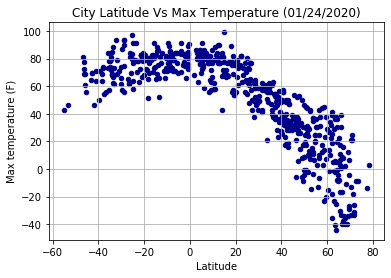

In [10]:
#Latitude vs Temperature Plot

weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("LatitudeVsTemperature.png")



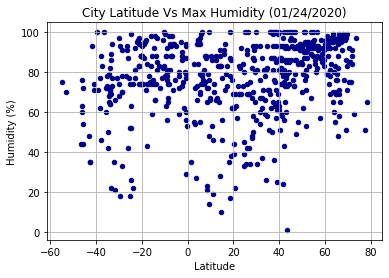

In [11]:
#Latitude vs Humidity Plot

weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("LatitudeVsHumidity.png")



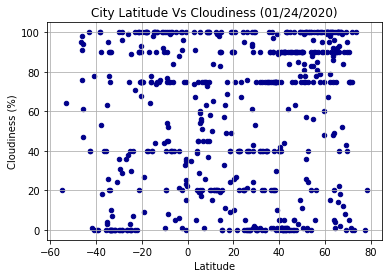

In [12]:
#Latitude vs Cloudiness Plot

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("LatitudeVsCloudiness.png")


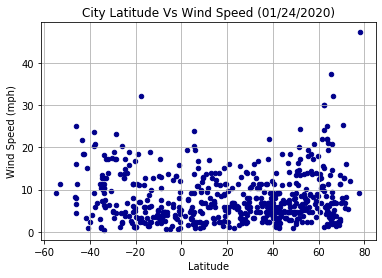

In [13]:
#Latitude vs. Wind Speed Plot
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("LatitudeVsWindSpeed.png")




# Linear Regression

In [14]:
nothern = weather_data.loc[weather_data["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["Lat"] < 0.0]
southern.reset_index(inplace=True)


In [15]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig("Temperature vs Latitude.png")
    plt.show()


The r-squared is: -0.8730860781868699


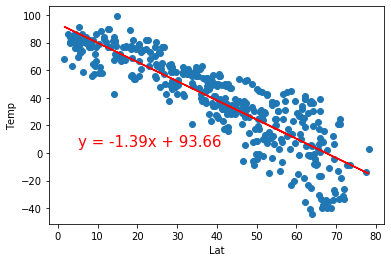

In [35]:
#Northern Hemisphere - Temperature (F) vs. Latitude
xlbl = "Lat"
ylbl = "Temp"
lblpos = (5,5)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)



The r-squared is: 0.4291664687562688


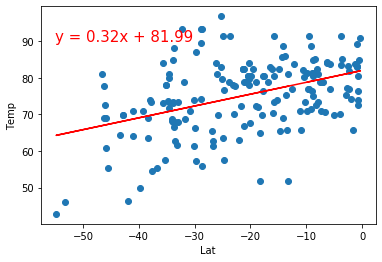

In [17]:
#Southern Hemisphere - Temperature (F) vs. Latitude
xlbl = "Lat"
ylbl = "Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)


The r-squared is: 0.3157933493758971


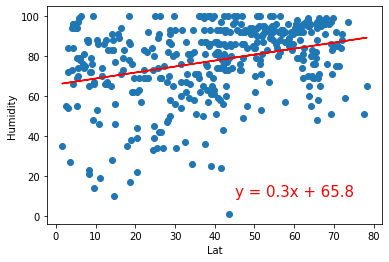

In [18]:
#Northern Hemisphere - Humidity (%) vs. Latitude
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)


The r-squared is: 0.29471044669718965


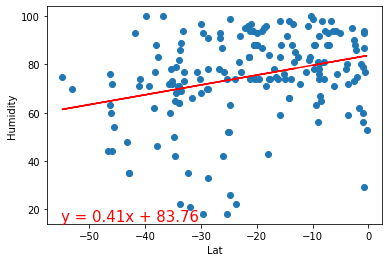

In [19]:
#Southern Hemisphere - Humidity (%) vs. Latitude
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)


The r-squared is: 0.21050963639164708


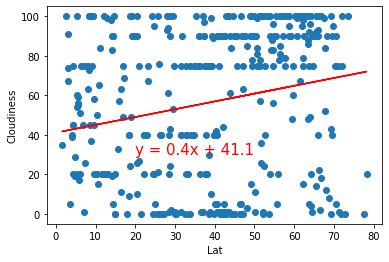

In [31]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)


The r-squared is: 0.17483431524292822


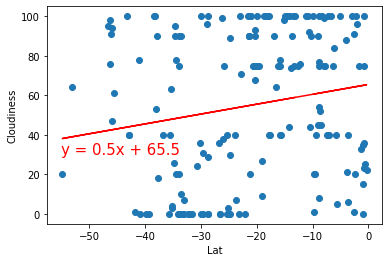

In [28]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,30)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)


The r-squared is: 0.19217406251333483


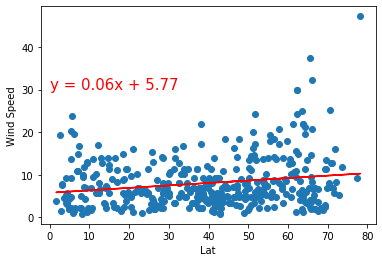

In [22]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)


The r-squared is: -0.3263733859164779


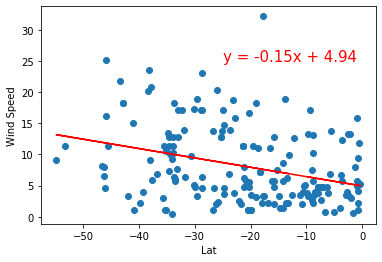

In [27]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,25) #just keep moving
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)


# Observations


# VacationPy


In [38]:
humidity = weather_data["Humidity"].astype(float)
maxhumidity = humidity.max()
locations = weather_data[["Lat", "Lng"]]

In [39]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=humidity,dissipating=False, max_intensity=maxhumidity,point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
narrowed_city_df = weather_data.loc[(weather_data["Temp"] > 70) & (weather_data["Temp"] < 80) & (weather_data["Cloudiness"] == 0), :]
narrowed_city_df = narrowed_city_df.dropna(how='any')
narrowed_city_df.reset_index(inplace=True)
del narrowed_city_df['index']
narrowed_city_df.head()


,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,broken hill,0,AU,1579846772,21,78.80,-31.95,141.43,13.87
1,sao filipe,0,CV,1579846778,77,70.68,14.90,-24.50,12.26
2,cape town,0,ZA,1579846500,64,73.00,-33.93,18.42,10.29
3,rikitea,0,PF,1579846781,81,78.13,-23.12,-134.97,18.77
4,tura,0,IN,1579846785,34,72.88,25.52,90.22,3.18


In [45]:
hotellist = []

for i in range(len(narrowed_city_df)):
    lat = narrowed_city_df.loc[i]['Lat']
    lng = narrowed_city_df.loc[i]['Lng']

    params = {
        "location": f"{lat},{lng}",
        "radius": 5000,
        "types" : "hotel",
        "key": api_key_google_maps
    }
    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    requested = requests.get(base_url, params=params)
    jsn = requested.json()
    try:
        hotellist.append(jsn['results'][0]['name'])
    except:
        hotellist.append("")
narrowed_city_df["Hotel Name"] = hotellist
narrowed_city_df = narrowed_city_df.dropna(how='any')
narrowed_city_df.head()


,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed,Hotel Name
0,broken hill,0,AU,1579846772,21,78.80,-31.95,141.43,13.87,Broken Hill
1,sao filipe,0,CV,1579846778,77,70.68,14.90,-24.50,12.26,Sao Filipe
2,cape town,0,ZA,1579846500,64,73.00,-33.93,18.42,10.29,Cape Town
3,rikitea,0,PF,1579846781,81,78.13,-23.12,-134.97,18.77,Rikitea
4,tura,0,IN,1579846785,34,72.88,25.52,90.22,3.18,Tura


In [46]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in narrowed_city_df.iterrows()]
locations = narrowed_city_df[["Lat", "Lng"]]


In [47]:
markers = gmaps.marker_layer(locations)
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))